1: Lat -4.3828920623433 | Long 76.925852301445 | Time 07/03/2024, 15:25:03
2: Lat -3.8222364400504 | Long 77.32352009323 | Time 07/03/2024, 15:25:14
3: Lat -3.2613210786729 | Long 77.72063141553 | Time 07/03/2024, 15:25:25
4: Lat -2.7001854729867 | Long 78.117267908047 | Time 07/03/2024, 15:25:36
5: Lat -2.138860791951 | Long 78.513516778826 | Time 07/03/2024, 15:25:47
6: Lat -1.577386319546 | Long 78.909459240539 | Time 07/03/2024, 15:25:58
7: Lat -1.0157930528199 | Long 79.305182149816 | Time 07/03/2024, 15:26:09
8: Lat -0.45412015230844 | Long 79.700766463797 | Time 07/03/2024, 15:26:20
9: Lat 0.10759941332489 | Long 80.096297417353 | Time 07/03/2024, 15:26:31
10: Lat 0.66933268400858 | Long 80.491860223549 | Time 07/03/2024, 15:26:42
11: Lat 1.2310405219109 | Long 80.887535777605 | Time 07/03/2024, 15:26:53
12: Lat 1.7926919712802 | Long 81.283410829079 | Time 07/03/2024, 15:27:04
13: Lat 2.4052943427806 | Long 81.715598801048 | Time 07/03/2024, 15:27:16
14: Lat 2.9667079503186 | L

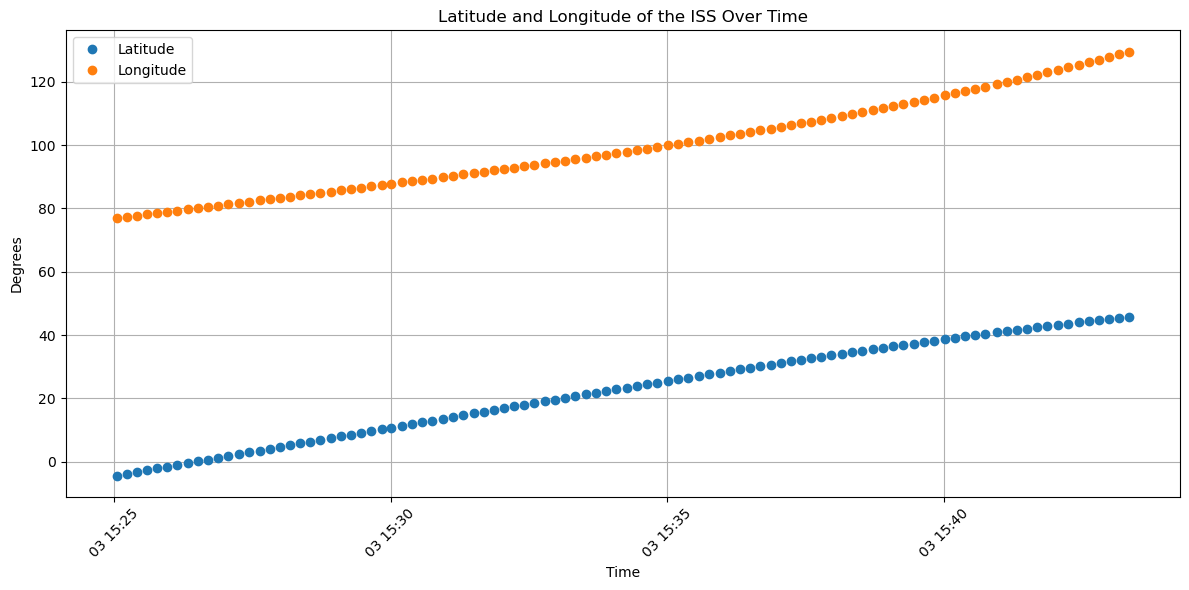

In [3]:
import requests
import time
import matplotlib.pyplot as graph
from datetime import datetime

url = "https://api.wheretheiss.at/v1/satellites/25544"
latitudes= []
longitudes= []
times= []
data_points= 100
ping_interval= 10
for i in range(data_points):
    response= requests.get(url)
    data= response.json()
    latitude = data['latitude']
    longitude = data['longitude']
    timestamp = data['timestamp']
    latitudes.append(latitude)
    longitudes.append(longitude)
    times.append(timestamp)
    print(f"{i + 1}: Lat {latitude} | Long {longitude} | Time {datetime.utcfromtimestamp(timestamp).strftime('%m/%d/%Y, %H:%M:%S')}")
    time.sleep(ping_interval)
time_labels = []
for timestamp in times:
    time_labels.append(datetime.utcfromtimestamp(timestamp))
graph.figure(figsize=(12, 6))
graph.plot(time_labels, latitudes, 'o', label='Latitude')
graph.plot(time_labels, longitudes, 'o', label='Longitude')
graph.title('Latitude and Longitude of the ISS Over Time')
graph.xlabel('Time')
graph.ylabel('Degrees')
graph.legend()
graph.xticks(rotation=45)
graph.grid(True)
graph.tight_layout()
graph.show()